# Exercise 1

Six independent observations from a Gaussian distribution $N(\mu, \sigma^{2})$ are given by {1.017, 2.221, 1.416, 0.641, 0.124, 1.728}. If $\sigma=0.75$ is known, find the symmetric confidence intervals for $\mu$ with confidence levels $1-\alpha$ = 0.68, 0.90, and 0.95, respectively.

The estimator $\hat{\mu}$ that will be used is the sample mean of the observations. The observations are all independent and are all Gaussian, therefore, the sample mean will follow a Gaussian distribution too, with parameters:

$$ \mu_{\hat{\mu}}=E(\hat{\mu})=E\big(\frac{\sum x_i}{n}\big) = \frac{1}{n} \sum E(x_i) = \frac{1}{n} \sum \mu = \mu \\
\sigma^2_{\hat{\mu}} =Var(\hat{\mu})=Var\big(\frac{\sum x_i}{n}\big) = \frac{1}{n^2} \sum Var(x_i) = \frac{\sigma^2}{n} $$

where $x_i$ are the observations which all follow the same distribution.

Thus, the probability that a symetric interval $[\hat{\mu}-\delta,\hat{\mu}+\delta]$ contains the real value $\mu$ will be:

$$ 1-\alpha = P(\hat{\mu}-\delta<\mu<\hat{\mu}+\delta)=P(\mu-\delta<\hat{\mu}<\mu+\delta) =\frac{1}{\sqrt{2\pi}\sigma_{\hat{\mu}}} \int_{\mu-\delta}^{\mu+\delta} x e^{-\frac{(x-\mu)^2}{2\sigma_{\hat{\mu}}^2}} dx = erf\bigg(\frac{\delta}{\sqrt{2}\sigma_{\hat{\mu}}}\bigg)$$

which can be rewritten as a root finding problem $C(\delta)=0$

\begin{equation}
erf\bigg(\frac{\delta}{\sqrt{2}\sigma_{\hat{\mu}}}\bigg)-1+\alpha = 0
\end{equation}

### Case 1: $\sigma$ is known

In [1]:
%matplotlib inline
#%matplotlib # [ORIOL]: Para 3d plots creo que es mucho mejor así, sin el inline
import numpy as np
import math
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)
import scipy.optimize as opt # optimization and root finding package 
import scipy.misc as msc
import scipy.special as spc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.colors as colors

In [2]:
def find_delta(delta, alpha, sigma):
    x = math.erf(delta/(np.sqrt(2)*sigma)) -1 + alpha
    return x

If sigma is known, then:

In [3]:
# Data:
obs = [1.1017, 2.221, 1.416, 0.641, 0.124, 1.728]
alpha = 1-np.array([0.68, 0.90, 0.95])
sigma_real = 0.75 # standard deviation of variable x (the observations) 

In [4]:
sigma_estimator = sigma_real/np.sqrt(len(obs)) # standard deviation of variable sample mean (or mu hat)
opt_delta = np.empty(len(alpha))
mu=np.mean(obs) 
print "Mu = %.3g\tsigma estimator = %.3g\n" %(mu,sigma_estimator)

for i in range(len(alpha)):
    opt_delta[i] = opt.fsolve(find_delta, sigma_estimator, args=(alpha[i],sigma_estimator))
    print "Delta:", opt_delta[i]
    print 'Interval [mu-delta, mu+delta]', mu-opt_delta[i], mu+opt_delta[i] 


Mu = 1.21	sigma estimator = 0.306

Delta: 0.304489298069
Interval [mu-delta, mu+delta] 0.900794035264 1.5097726314
Delta: 0.50363151095
Interval [mu-delta, mu+delta] 0.701651822384 1.70891484428
Delta: 0.600113959544
Interval [mu-delta, mu+delta] 0.605169373789 1.80539729288


 ### Case 2: $\sigma$ is unknown. 

If we did not have sigma, we would first estimate it and use this estimate as our actual value. The resulting confidence intervals would be an estimation of the real confidence intervals shown above. The code below takes sigma as the std of the measurements.

In [5]:
sigma_estimated = np.std(obs) # estimated value of the standar deviation of variable x
print sigma_estimated
sigma_est_estimator = sigma_estimated/np.sqrt(len(obs)) # estimated value of the standard deviation of variable mu hat  

opt_delta_estimated = np.empty(len(alpha))
delta_t_student = np.empty(len(alpha))
mu_hat=np.mean(obs)
print "Mu = %.3g and Sigma = %.3g\n" %(mu, sigma_est_estimator)

for i in range(len(alpha)):
    opt_delta_estimated[i] = opt.fsolve(find_delta, sigma_est_estimator, args=(alpha[i],sigma_est_estimator))
    delta_t_student[i] = stat.t.interval(1-alpha[i],len(obs),0,sigma_est_estimator)[1]
    
    #if our estimated delta was the true one, our results would match the values in the alpha array.
    print "1-alpha = %.3f" %(1-alpha[i])
    print "\tGaussian approximation resulting 1-alpha = %.3f" %math.erf(opt_delta_estimated[i]/(np.sqrt(2)*sigma_estimator)) 
    print "\t\tDelta gaussian = ", opt_delta_estimated[i]
    print '\t\tInterval [mu-delta, mu+delta]', mu-opt_delta_estimated[i], mu+opt_delta_estimated[i] 
    print "\tT-student approximation resulting 1-alpha = %.3f" %math.erf(delta_t_student[i]/(np.sqrt(2)*sigma_estimator)) 
    print "\t\tDelta t-student= ", delta_t_student[i]
    print '\t\tInterval [mu-delta, mu+delta]', mu-delta_t_student[i], mu+delta_t_student[i] 
    

0.688916227168
Mu = 1.21 and Sigma = 0.281

1-alpha = 0.680
	Gaussian approximation resulting 1-alpha = 0.639
		Delta gaussian =  0.279690157918
		Interval [mu-delta, mu+delta] 0.925593175415 1.48497349125
	T-student approximation resulting 1-alpha = 0.681
		Delta t-student=  0.304866937045
		Interval [mu-delta, mu+delta] 0.900416396288 1.51015027038
1-alpha = 0.900
	Gaussian approximation resulting 1-alpha = 0.869
		Delta gaussian =  0.462613227209
		Interval [mu-delta, mu+delta] 0.742670106125 1.66789656054
	T-student approximation resulting 1-alpha = 0.926
		Delta t-student=  0.546517261981
		Interval [mu-delta, mu+delta] 0.658766071353 1.75180059531
1-alpha = 0.950
	Gaussian approximation resulting 1-alpha = 0.928
		Delta gaussian =  0.55123765984
		Interval [mu-delta, mu+delta] 0.654045673493 1.75652099317
	T-student approximation resulting 1-alpha = 0.975
		Delta t-student=  0.688191197391
		Interval [mu-delta, mu+delta] 0.517092135942 1.89347453072


# Exercise 2

Let's imagine that an LHC experiment measures the number of events produced in a certain decay channel of the Higgs particle. Let's call $\nu$ the expected number of events, assuming there is no background. Then, the probability to measure exactly $N$ events in an experiment is given by the Poisson probability distribution:

$$
P(N,\nu)= \frac{\nu^{N}}{N!} e^{-\nu}
$$

## Part I

Check that $P(N; \nu)$ is properly normalized. Given an observed value of $N (=N_{obs})$, find a frequentist unbiased esitmator for $\nu$. Compute its expected value and variance. _[Hint: compute $<N>$ and $<N(N-1)>$ first.]_

### Normalization
To check wheter a discrete pmf is normalized we have to sum its values for all possible outcomes, in the case of a Poisson, between 0 and $\infty$.

$$\sum_{n=0}^\infty P(n;\nu)= e^{-\nu} \sum_{n=0}^\infty \frac{\nu^{n}}{n!} = e^{-\nu} e^{\nu} = 1 $$

where only the Taylor expansion of an exponential needs to be known.

### Unbiased estimator
The maximum likelihood can be used to find an estimator whithin the frequentist interpretation of probability, and in many cases it is unbiased. Starting from the likelihood of $m$ observations:

$$
L(\{ N_{i}\} ;\nu)=\prod_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}e^{-\nu}=e^{-\nu m}\prod_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!} \\
l(\{ N_{i}\} ;\nu)=-\log L(\{ N_{i}\} ;\nu)=-(-\nu_{m}+\sum_{i=1}^{m} N_{i}\log\nu-\sum_{i=1}^{m} \log N_{i}!)=\nu_{m}-\sum_{i=1}^{m} N_{i}\log\nu-\sum_{i=1}^{m} \log N_{i}!
$$

once the likelihood and the log likelihood are known, it can be maximized with respect to the parameter that wants to be estimated in order to find the estimator:

$$
\frac{\partial P}{\partial\nu}\bigg\rvert_{\nu=\hat{\nu}ML}=m-\sum\frac{N_{i}}{\hat{\nu}_{ML}}=0 \quad \rightarrow \quad \hat{\nu}_{ML}=\frac{1}{m}\sum_{i=1}^{m}N_{i}\\
$$

### Expected value and variance of the estimator
To help afterwards in the calculation of the expected values of the estimator, first some expected values for the poisson distribution will be calculated:

$$E[N]=\sum_{n=0}^\infty nP(n;\nu)= e^{-\nu} \sum_{n=1}^\infty n \frac{\nu^{n}}{n!} = \nu e^{-\nu} \sum_{n=1}^\infty \frac{\nu^{n-1}}{(n-1)!} = \nu e^ {-\nu} \sum_{n=0}^\infty \frac{\nu^{m}}{m!} = \nu e^{-\nu} e^{\nu} = \nu$$ 

Note that the fisrt term of the sum has $n=0$, therefore it is zero and can be removed from the sum. Therefore, by taking common factor of $\nu$ and changing the index of the sum to $m=n-1$ (and thus changing the limits to $m=0$ to $\infty$) the Taylor expension of the exponential is obtained again. 

$$E[N(N-1)]= \sum_{n=0}^\infty n(n-1) P(n;\nu)= \sum_{n=2}^\infty n(n-1) \frac{\nu^{n}}{n!} e^{-\nu}= e^{-\nu} \nu^{2} \sum_{n=2}^\infty \frac{\nu^{n-2}}{(n-2)!}= e^{-\nu} \nu^{2}\nu= \nu^{2}$$

$$E[N(N-1)]= E[N^{2}]-E[N] \quad \rightarrow \quad E[N^{2}]= E[N(N-1)]+ E[N]= \nu^{2}+\nu$$

$$Var[N]= E[N^{2}]-\big(E[N]\big)^{2}= \nu^{2}+\nu-\nu^{2}= \nu$$

Therefore, the expected values of the estimator can be easily calculated:

$$
E[\hat{\nu}_{ML}] =E\bigg[\frac{1}{m}\sum_{i=1}^{m} N_{i}\bigg] =\frac{1}{m}\sum_{i=1}^{m} E[N_{i}] =\frac{1}{m}\sum_{i=1}^{m}\nu=\nu.
$$

$$Var[\hat{\nu}_{ML}]= Var[\frac{1}{n} \sum_{i=1}^{N} N_{i}]= \frac{1}{n^{2}} \sum_{i=1}^{n} Var[N_{i}]= \frac{1}{n^{2}} n \nu= \frac{\nu}{n}$$

[Oriol]: Los enunciados y explicaciones teóricas de los apartados II-V están debajo, en el título correspondiente. Sin embargo, os recomiendo muchísimo que cúando ejecuteís las diferentes partes lo hagaís con el código que tiene de título Part II-VII modificando los plots si es necesario, por así evitar que algo previamente definido (y que la notebook no olvida pero los humanos sí que olvidamos) haga que os salgan resultados sin sentido. 

Una alternativa a eso es modificar los nombres para que no haya coincidencias, pero creo que no vale la pena o hacer restart del notebook cada vez que queraís ejecutar código de partes entriores (no celdas sino partes) y volver a ejecutar la primera celda y des de aquí por orden.

## Part II
Assume now that the pdf for the estimator of $\nu$ is a Gaussian. using the expected value and variance computed in part I, plot the Gaussian pdf corresponding to $N_{obs}=150$.

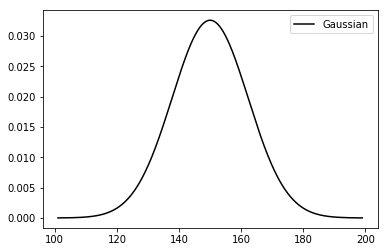

In [6]:
observed_values = np.array([150])
num_observations = len(observed_values)

nu_estimated = np.mean(observed_values)


# Expected gaussian pdf
mu = nu_estimated
sigma = np.sqrt(nu_estimated)
dist = stat.norm(mu, sigma)
x_pdf = np.linspace(mu-4*sigma, mu+4*sigma, 1000)

#Plot distributions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.legend()


## Part III
Let's now construct the pdf for the estimator of $\nu$ using a MC simulation.
 1. Let $q$ be the estimator obtained for $N_{obs}=150$. Generate $10^6$ MC experiments with $\nu=q$. Draw one value of $N(=N_i)$ from each one
 2. For each experiment $i$ use $N_i$ to compute the new estimator $q_i$.
 3. Plot the histogram of values of $q_i$. Compare it with the result of part II. Is it a Gaussian?

The Montecarlo generated distribution has:
	mean = 150.011604,
	variance = 150.119523,
	skewness = 0.078758
	and kurtosis = 0.006112


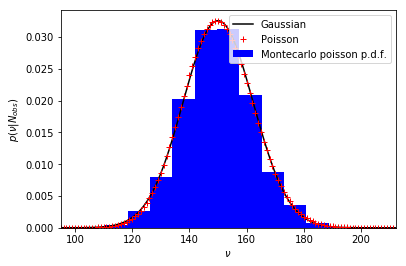

In [7]:
poisson = stat.poisson(nu_estimated)
N = 10**6
mc_sample = poisson.rvs(N)
x_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
x_pmf = np.arange(min(mc_sample), max(mc_sample)) # We use the pmf because the 
                                            # Poisson takes discrete values
mu=np.mean(mc_sample)
variance =np.var(mc_sample) # equivalent to np.sqrt(np.var(nu_mc_sample))
skewness = stat.skew(mc_sample)
kurtosis=stat.kurtosis(mc_sample)

print 'The Montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, variance, skewness, kurtosis)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f.')
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.plot(x_pmf, poisson.pmf(x_pmf), 'r+', label = 'Poisson')
ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

## Note: Useful integral
From here on, intensive use of the following integral formula from wikipedia will be used:
$$
\int_{0}^{\infty} x^{n}e^{-ax}dx = \frac{n!}{a^{n+1}} \quad n\in \mathbb{N}
$$

## Part IV
Assuming a prior for $\nu$ uniform between 0 and infinity, compute the Bayesian posterior pdf for $\nu$. Note that it is not a Gaussian. Plot the PDF for $N_{\text{obs}}$ and compare it with the results in II and III.

### Posterior calculation (linear prior)
Before calculating the posterior, the three terms involved in its calculation will be specified. For simplicity, from now on everything will be constrained to $m=1$.

$$
L(N ;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}
$$

$$
\Pi(\nu)= 
\begin{cases}
0 & \nu<0 \\
c & \nu>0
\end{cases}
$$

$$
\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu = \int_{0}^{\infty} \frac{\nu^{N}}{N!}e^{-\nu} c d\nu = \frac{c}{N!} \int_{0}^{\infty} \nu^{N}e^{-\nu}d\nu = \frac{c}{N!} N! =c 
$$

Therefore, the posterior probability is:

$$
P(\nu;N)=\frac{L(N ;\nu)\Pi(\nu)}{\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu}=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{N}}{N!}e^{-\nu} & \nu>0
\end{cases}
$$

However, due to the huge powers and exponentials, the computations will be done with the logarithm of $P(\nu;N)$ for $\nu>0$ and eventually exponentiated to plot the real value.

$$ \log\big(P(\nu;N)\rvert_{\nu>0}\big)=-\nu+N\log(\nu)-\log(N!)$$

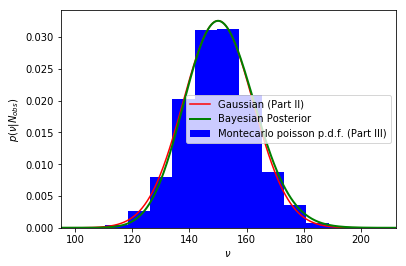

In [8]:
nu_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
Nobs = observed_values[0]

# nu_posterior = np.exp(-nu_pdf )*(nu_pdf**observed_values/msc.factorial(observed_values)) --> Treballarem amb logs per evitar overflow

log_nu_posterior = -nu_pdf + Nobs*np.log(nu_pdf) - np.log(msc.factorial(Nobs))
nu_posterior = np.exp(log_nu_posterior)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-r', label = 'Gaussian (Part II)')
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')
#ax.plot(x_pmf, poisson.pmf(x_pmf), 'r', label = 'Poisson')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

## Part V
Let's now construc the Bayesian posterior pdf for $\nu$ using a MC simulation:
 1. Generate $10^7$ values for $\nu$ drawn from a uniform distribution between 0 and a large number (for instance, $N_{obs}+10\sqrt{N_{obs}}$). This is our prior pdf.
 2. For each value of $\nu$ generate one value of $N$ according to a Poisson distribution with parameter $\nu$
 3. If $N=N_{obs}$ keep the value of $\nu$. Otherwise, discard.
 4. Plot the histogram of the values of $\nu$ that have been kept. Is it a Gaussian?
 5. Compute the sample mean and the variance from the histogram of $\nu$. Plot a Gaussian of these mean and variance. Compare to section V.4.

[Oriol]: Note that $N_{obs}+10\sqrt{N_{obs}}\approx \mu+10\sigma$

In [9]:
N=10**7
nu_rndm = np.random.random(N)*(Nobs+10*np.sqrt(Nobs))
poisson = stat.poisson(nu_rndm)
N_mc = poisson.rvs(N) #We'll draw a sample from N_mc 
nu_mc_sample = nu_rndm[N_mc==Nobs] # Solo nos quedamos con los valores de nu en nu_rndm con los que al generar la Poisson, 
                                    # nos han dado, en el primer intento, que el de N_mc es igual a N_obs

(D)

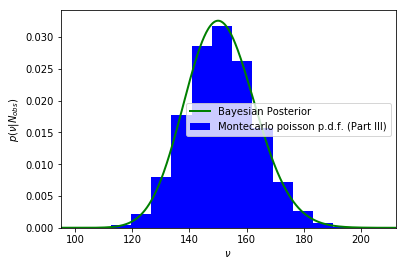

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(nu_mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend() 

In [11]:
print len(nu_mc_sample) #this is the number of values that we select from N_mc sample

36509


(E)

In [12]:
mu=np.mean(nu_mc_sample)
variance =np.var(nu_mc_sample) # equivalent to np.sqrt(np.var(nu_mc_sample))
skewness = stat.skew(nu_mc_sample)
kurtosis=stat.kurtosis(nu_mc_sample)

print 'The Montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, variance, skewness, kurtosis)

The Montecarlo generated distribution has:
	mean = 151.159450,
	variance = 151.059670,
	skewness = 0.147555
	and kurtosis = 0.056280


## Part VI
Repeat for $N_{obs}=10$

## Part VII
Repeat for $N_{obs}=1$

## Parts II-VII

Las dos celdas que siguen sirven para haver los apartados II-V, VI i VII de manera sintetizada. 

[Oriol]: Debajo, los plots se pueden pesonalizar a gusto, jugando con el numero y posición de los subplots y en qué subplot está cada gráfico. Los tres numeros de los subplots definen una cuadrícula y una posición en esa cuadrícula. La posición dentro de la cuadrícula tiene que ser menor o igual al producto de los dos primeros números. Para ejemplos podéis mirar los plots tal y como están ahora.

In [13]:
Nobs = 10
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+6*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior_lin = -nu_grid + Nobs*np.log(nu_grid) - np.log(msc.factorial(Nobs))
nu_posterior_lin = np.exp(log_nu_posterior_lin)

# Part V
N_V_lin=10**7
nu_prior_lin = np.random.random(N_V_lin)*(Nobs+10*np.sqrt(Nobs))
poisson_V_lin = stat.poisson(nu_prior_lin)
N_mc_lin = poisson_V_lin.rvs(N_V_lin) #We'll draw a sample from N_mc 
mc_sample_V_lin = nu_prior_lin[N_mc_lin==Nobs]
print len(mc_sample_V_lin)

# Part V.E)
mu_VE_lin = np.mean(mc_sample_V_lin)
sigma_VE_lin = np.std(mc_sample_V_lin)
gaussian_VE_lin = stat.norm(mu_VE_lin, sigma_VE_lin)

240067


/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


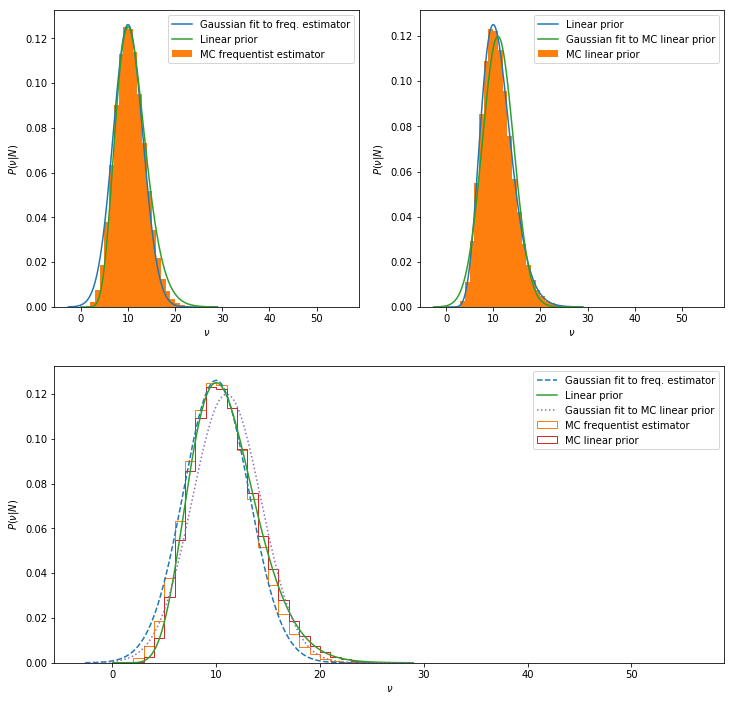

In [14]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
Nbins = np.arange(int(nu_grid[0]),int(2*nu_grid[-1])) # For the case Nobs = 1, to have bins between integer values. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,gaussian_II.pdf(nu_grid), label='Gaussian fit to freq. estimator')
ax1.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, label='MC frequentist estimator')
ax1.plot(nu_grid,nu_posterior_lin, label='Linear prior')

ax2.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax2.hist(mc_sample_V_lin, normed=1, range=rng, bins=Nbins, label='MC linear prior')
ax2.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), label='Gaussian fit to MC linear prior')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, histtype="step", label='MC frequentist estimator')
ax3.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax3.hist(mc_sample_V_lin, normed=1, range=rng, bins=Nbins, histtype="step", label='MC linear prior')
ax3.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), ':', label='Gaussian fit to MC linear prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

In [15]:
mu_V =np.mean(mc_sample_V_lin)
variance_V =np.var(mc_sample_V_lin) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V_lin)
kurtosis_V=stat.kurtosis(mc_sample_V_lin)

print ('the moments for the MC simulatiom with linear prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for the MC simulatiom with linear prior are:
	mean = 11.005085,
	variance = 11.061862,
	skewness = 0.606733
	and kurtosis = 0.586780
The moments for the MC simulation with N=nu (part III):
	mean = 9.998091,
	variance = 10.013061,
	skewness = 0.317814
	and kurtosis = 0.104535


## Part VIII
Repeat steps IV to VII using now a prior for $\nu$ uniform in $\log\nu$. Compare to the previous results.

A constant prior in $\log\nu$ implies:

$$ \Pi(\nu)d\log\nu=c d\log\nu=\frac{c}{\nu} d\nu$$

In our case:

$$
\Pi(\nu)= 
\begin{cases}
0 & \nu<0 \\
\frac{c}{\nu} & \nu>0
\end{cases}
$$

The likelihood is the same as for the linear case:

$$L(N ;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}$$

Therefore, the normalization factor becomes:

$$
\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu = \int_{0}^{\infty} \frac{\nu^{N}}{N!}e^{-\nu} \frac{c}{\nu} d\nu = \frac{c}{N!} \int_{0}^{\infty} \nu^{N-1}e^{-\nu}d\nu = \frac{c}{N!} (N-1)! = \frac{c}{N}
$$

Therefore, the posterior probability is:

$$
P(\nu;N)=\frac{L(N ;\nu)\Pi(\nu)}{\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu}=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{N}}{N!}e^{-\nu}\frac{c}{\nu}\frac{N}{c}=\frac{\nu^{N-1}}{(N-1)!}e^{-\nu} & \nu>0
\end{cases}
$$

However, like in the linear case, due to the huge powers and exponentials, the computations will be done with the logarithm of $P(\nu;N)$ for $\nu>0$ and eventually exponentiated to plot the real value.

$$ \log\big(P(\nu;N)\rvert_{\nu>0}\big)=-\nu+(N-1)\log(\nu)-\log\big((N-1)!\big)$$


### Simulating with an improper prior
For the linear case, we have easily solved the problem of the improper prior because generating a uniform sample is really easy, and the only trick used was to make it between 0 and $N_{obs}+10\sqrt{N_{obs}}$. Now, generating  a sample following this prior is not that simple, and it has to be done either by try-reject or inverse sampling. 

Due to the shape of the pdf filling a ridiculously small area of any square containing it, the try-reject was discarded.

Inversion sampling does not require a finite box, but in this case, as it does require the cdf and it is an improper pdf, the range of the prior has been limited to $\nu\in[{\nu_{LIM}}^{-1},\nu_{LIM}]$, being $\nu_{LIM}=N_{obs}+10\sqrt{N_{obs}}$. Therefore:

$$\int_{{\nu_{LIM}}^{-1}}^{\nu_{LIM}} \frac{c}{\nu} d\nu = c \Big[\log \nu \Big]_{{\nu_{LIM}}^{-1}}^{\nu_{LIM}} = 2c\log\nu_{LIM} \quad \Rightarrow \quad c=\frac{1}{2\log\nu_{LIM}}$$

And the cdf is:

$$ F_\Pi(\nu)= \int_{{\nu_{LIM}}^{-1}}^{\nu} \frac{c}{x} dx = c \Big[\log x \Big]_{{\nu_{LIM}}^{-1}}^{\nu} = c(\log\nu+\log\nu_{LIM})$$

whose invertion in order to do inverse sampling is:

$$ r = c(\log\nu+\log\nu_{LIM}) \quad \rightarrow \quad \frac{r}{c}-\log\nu_{LIM}= \log\nu\\ 
F_\Pi^{-1}(r)=\nu = \frac{1}{\nu_{LIM}}e^{\frac{r}{c}} = \frac{1}{\nu_{LIM}}e^{2r\log\nu_{LIM}}$$




In [16]:
Nobs = 1
nu_grid = np.linspace(Nobs-5*np.sqrt(Nobs), Nobs+6*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior_log = -nu_grid + (Nobs-1)*np.log(nu_grid) - np.log(msc.factorial(Nobs-1))
nu_posterior_log = np.exp(log_nu_posterior_log)

# Part V
N_V_log=10**6
nu_lim = Nobs+10*np.sqrt(Nobs)
# For Nobs=1 it is better to increase the value
nu_lim = Nobs+1000*np.sqrt(Nobs)
r_prior_log = np.random.random(N_V_log)
nu_prior_log = np.exp(2*r_prior_log*np.log(nu_lim))/nu_lim
poisson_V_log = stat.poisson(nu_prior_log)
N_mc_log = poisson_V_log.rvs(N_V_log) #We'll draw a sample from N_mc 
mc_sample_V_log = nu_prior_log[N_mc_log==Nobs]

# Part V.E)
mu_VE_log = np.mean(mc_sample_V_log)
sigma_VE_log = np.std(mc_sample_V_log)
gaussian_VE_log = stat.norm(mu_VE_log, sigma_VE_log)

/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


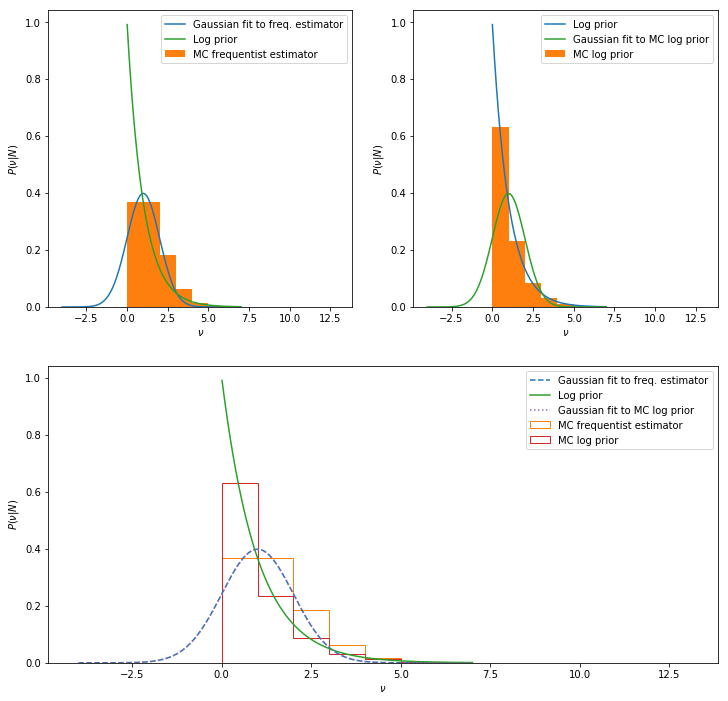

In [17]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
Nbins = np.arange(int(nu_grid[0]),int(2*nu_grid[-1])) # For the case Nobs = 1, to have bins between integer values. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,gaussian_II.pdf(nu_grid), label='Gaussian fit to freq. estimator')
ax1.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, label='MC frequentist estimator')
ax1.plot(nu_grid,nu_posterior_log, label='Log prior')

ax2.plot(nu_grid,nu_posterior_log, label='Log prior')
ax2.hist(mc_sample_V_log, normed=1, range=rng, bins=Nbins, label='MC log prior')
ax2.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), label='Gaussian fit to MC log prior')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')
ax3.plot(nu_grid,nu_posterior_log, label='Log prior')
ax3.hist(mc_sample_V_log, normed=1, histtype="step", range=rng, bins=Nbins, label='MC log prior')
ax3.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), ':', label='Gaussian fit to MC log prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

In [18]:
mu_V =np.mean(mc_sample_V_log)
variance_V =np.var(mc_sample_V_log) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V_log)
kurtosis_V=stat.kurtosis(mc_sample_V_log)

print ('the moments for the MC simulatiom with log prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for the MC simulatiom with log prior are:
	mean = 1.003435,
	variance = 1.002674,
	skewness = 2.031492
	and kurtosis = 6.389633
The moments for the MC simulation with N=nu (part III):
	mean = 1.001186,
	variance = 1.001269,
	skewness = 0.995658
	and kurtosis = 0.964588


### Theoretical moments
The uniform prior in $\log\nu$ is exactly the same as the uniform prior in $\nu$ changing $N$ for $N-1$. Therefore, the calculations of expected values and moments will be done with $m$, and substituting it by $N$ or $N-1$ will yield the result in the desired case:

$$ P(\nu;m)=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{m}}{(m)!}e^{-\nu} & \nu>0
\end{cases} $$

Therefore, the $k$th order moment will be:

$$E[\nu^k]=\int_0^{\infty} \nu^k\frac{\nu^{m}}{m!}e^{-\nu}d\nu = \frac{1}{m!}\int_0^{\infty} \nu^{m+k}e^{-\nu}d\nu = \frac{(m+1+k)!}{m!}=\prod_{i=1}^k (m+i)$$

Once the $k$th order moments are known, the following formulas can be used to calculate the variance and the skewness from them:

$$ Var[\nu] = E[\nu^2]-(E[\nu])^2 = (m+1)(m+2) - (m+1)^2 = (m+1)(m+2-m-1)=(m+1)$$

$$\gamma_1=\frac{E[\nu^3]-3E[\nu]Var[\nu]-(E[\nu])^3}{(Var[\nu])^{3/2}} =\frac{(m+1)(m+2)(m+3)-3(m+1)^2-(m+1)^3}{(m+1)\sqrt{m+1}} = \frac{(m+2)(m+3)-3(m+1)-(m+1)^2}{\sqrt{m+1}} = \frac{m^2+5m+6-3m-3-m^2-2m-1}{\sqrt{m+1}} = \frac{2}{\sqrt{m+1}}$$

The theoretical moments of the posterior for a logarithmic prior ($m=N-1$):

$$
Mean \rightarrow E[\nu] = N \\
Variance \rightarrow Var[\nu] = N \\
Skewness \rightarrow \gamma_1=\frac{2}{\sqrt{N}}
$$

The theoretical moments ofthe posterior for a linear prior ($m=N$):
$$
Mean \rightarrow E[\nu] = N +1 \\
Variance \rightarrow Var[\nu] = N +1 \\
Skewness \rightarrow \gamma_1=\frac{2}{\sqrt{N +1}}
$$


### Comparison between priors

In [19]:
Nobs = 150 #Change this parameter to see how it shapes the graph
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+4*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV lin
log_nu_posterior_lin = -nu_grid + Nobs*np.log(nu_grid) - np.log(msc.factorial(Nobs))
nu_posterior_lin = np.exp(log_nu_posterior_lin)

# Part V lin
N_V_lin=10**7
nu_prior_lin = np.random.random(N_V_lin)*(Nobs+10*np.sqrt(Nobs))
poisson_V_lin = stat.poisson(nu_prior_lin)
N_mc_lin = poisson_V_lin.rvs(N_V_lin) #We'll draw a sample from N_mc 
mc_sample_V_lin = nu_prior_lin[N_mc_lin==Nobs]
print len(mc_sample_V_lin)

# Part V.E) lin
mu_VE_lin = np.mean(mc_sample_V_lin)
sigma_VE_lin = np.std(mc_sample_V_lin)
gaussian_VE_lin = stat.norm(mu_VE_lin, sigma_VE_lin)

# Part IV log
log_nu_posterior_log = -nu_grid + (Nobs-1)*np.log(nu_grid) - np.log(msc.factorial(Nobs-1))
nu_posterior_log = np.exp(log_nu_posterior_log)

# Part V log
N_V_log=5*10**7
nu_lim = Nobs+10*np.sqrt(Nobs)
# For Nobs=1 it is better to increase the value, which may also require to increase N_V_log
nu_lim = Nobs+10000*np.sqrt(Nobs)
r_prior_log = np.random.random(N_V_log)
nu_prior_log = np.exp(2*r_prior_log*np.log(nu_lim))/nu_lim
poisson_V_log = stat.poisson(nu_prior_log)
N_mc_log = poisson_V_log.rvs(N_V_log) #We'll draw a sample from N_mc 
mc_sample_V_log = nu_prior_log[N_mc_log==Nobs]
print len(mc_sample_V_log)

# Part V.E) log
mu_VE_log = np.mean(mc_sample_V_log)
sigma_VE_log = np.std(mc_sample_V_log)
gaussian_VE_log = stat.norm(mu_VE_log, sigma_VE_log)

36645
14496


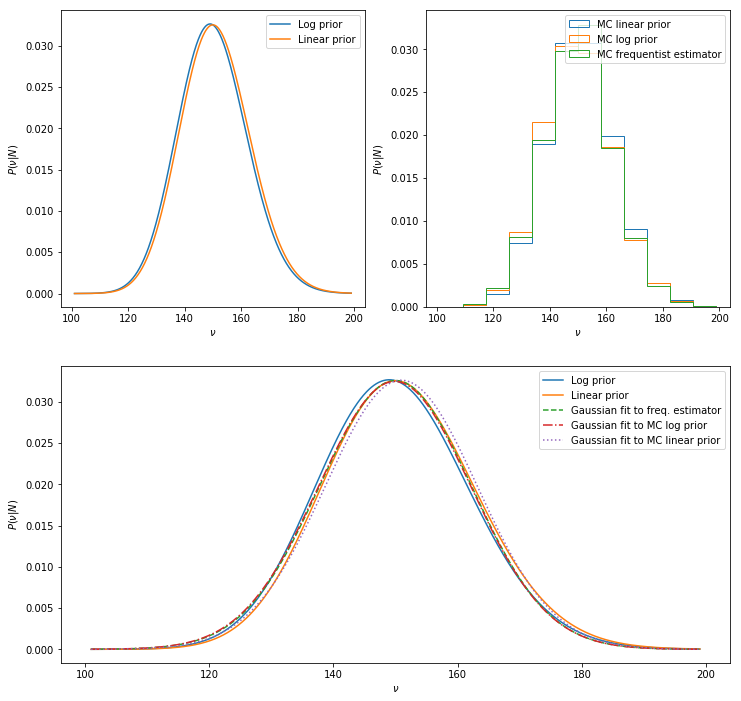

In [20]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
#Nbins = np.arange(int(nu_grid[0]),int(2*nu_grid[-1])) # For the case Nobs = 1, to have bins between integer values. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,nu_posterior_log, label='Log prior')
ax1.plot(nu_grid,nu_posterior_lin, label='Linear prior')

ax2.hist(mc_sample_V_lin, normed=1, histtype="step", range=rng, bins=Nbins, label='MC linear prior')
ax2.hist(mc_sample_V_log, normed=1, histtype="step", range=rng, bins=Nbins, label='MC log prior')
ax2.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')

ax3.plot(nu_grid,nu_posterior_log, label='Log prior')
ax3.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), '-.', label='Gaussian fit to MC log prior')
ax3.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), ':', label='Gaussian fit to MC linear prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

## Part IX
What can you canclude about the similitudes and differences between the frequentist and Bayesian results? What can you conclude about the importance of choosing Jeffrey's prior? And about the validity of the gaussian approximations for the pdf?

La aproximación frequentista da una probabilidad grande para nu < 0, en cambio la aproximacion bayesiana la probabilidad de encontrar nu < 0 es zero. Para ambas aproximaciones, la mean es similar.



### Freq vs Bayes
For $N$ large, both approaches are basically equivalent. For smaller $N$, freq. approach may yield incoherent results (i.e. $P(\nu<0)\neq0$) which will not happen with the bayesian, but the bayesian may be biased due to the election of the prior.

### Jeffrey's prior
Jeffrey's prior refers to the prior chosen with the Jeffrey's rule, which is:

$$ \Pi(\theta) \propto \mathbf{F}^{1/2}(\theta) $$

where

$$ \mathbf{F}(\theta)=-E\Big[\frac{\partial^2 (\log L(\theta))}{\partial \theta^2}\Big] $$

In the case of a Poisson:

$$ L(N;\nu) = \frac{\nu^{N}}{N!}e^{-\nu} \\
-\log\big(L(N;\nu)\big)=\nu-N\log\nu-\log(N!) \\
\frac{\partial (-\log L(N;\nu))}{\partial \nu} = 1-\frac{N}{\nu} \\
\frac{\partial^2 (-\log L(N;\nu))}{\partial \nu^2}= \frac{N}{\nu^2} \\
\mathbf{F}(\nu)=E\bigg[\frac{\partial^2 (-\log L(N;\nu))}{\partial \nu^2}\bigg]=\frac{E[N]}{\nu^2}=\frac{1}{\nu}$$

Which means that:

$$ \Pi(\nu) \propto \mathbf{F}^{1/2}(nu) = \nu^{-1/2} $$

### Jeffrey's prior
Jeffrey's prior has been found to be:

$$
\Pi(\nu)= 
\begin{cases}
0 & \nu<0 \\
c\nu^{-1/2} & \nu>0
\end{cases}
$$

The likelihood is the same as for the linear and logarithmic case:

$$L(N ;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}$$

Therefore, the normalization factor becomes:

$$
\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu = \int_{0}^{\infty} \frac{\nu^{N}}{N!}e^{-\nu} c\nu^{-1/2} d\nu = \frac{c}{N!} \int_{0}^{\infty} \nu^{N-\frac{1}{2}}e^{-\nu}d\nu = \frac{c}{N!} \Gamma(N+\frac{1}{2})
$$

where we have used:

$$ \int_0^\infty x^ne^{-ax}dx = \frac{\Gamma(n+1)}{a^{n+1}} $$

Therefore, the posterior probability is:

$$
P(\nu;N)=\frac{L(N ;\nu)\Pi(\nu)}{\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu}=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{N}}{N!}e^{-\nu}c\nu^{-1/2}\frac{N!}{c\Gamma(N+\frac{1}{2})} =\frac{\nu^{N-\frac{1}{2}}}{\Gamma(N+\frac{1}{2})}e^{-\nu} & \nu>0
\end{cases}
$$

However, like in the linear case, due to the huge powers and exponentials, the computations will be done with the logarithm of $P(\nu;N)$ for $\nu>0$ and eventually exponentiated to plot the real value.

$$ \log\big(P(\nu;N)\rvert_{\nu>0}\big)=-\nu+(N-\frac{1}{2})\log(\nu)-\log\big(\Gamma(N+\frac{1}{2})\big)$$

### Simuating with Jeffrey's prior


In [21]:
Nobs = 1
nu_grid = np.linspace(Nobs-5*np.sqrt(Nobs), Nobs+6*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV - Jeffrey's prior (we're using the log so that P(nu) doesn't blow up)
log_nu_posterior_jef = -nu_grid + (Nobs-1./2.)*np.log(nu_grid) - np.log(spc.gamma(Nobs+1./2.))
nu_posterior_jef = np.exp(log_nu_posterior_jef)

# Part V jef
N_V_jef = 10**6
nu_lim = Nobs+10*np.sqrt(Nobs)
# For Nobs=1 it is better to increase the value
#nu_lim = Nobs+1000*np.sqrt(Nobs)
r_prior_jef = np.random.random(N_V_jef)
nu_prior_jef = 4*nu_lim**2*r_prior_jef**2
poisson_V_jef = stat.poisson(nu_prior_jef)
N_mc_jef = poisson_V_jef.rvs(N_V_jef) #We'll draw a sample from N_mc 
mc_sample_V_jef = nu_prior_jef[N_mc_jef==Nobs]
print len(mc_sample_V_jef)

# Part V.E) jef
mu_VE_jef = np.mean(mc_sample_V_jef)
sigma_VE_jef = np.std(mc_sample_V_jef)
gaussian_VE_jef = stat.norm(mu_VE_jef, sigma_VE_jef)

19970


/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


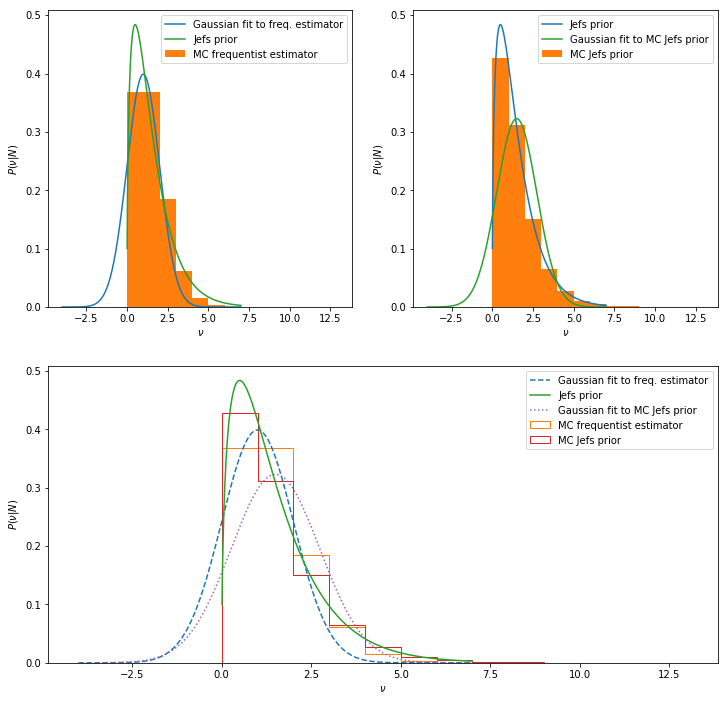

In [22]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
Nbins = np.arange(int(nu_grid[0]),int(2*nu_grid[-1])) # For the case Nobs = 1, to have bins between integer values. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,gaussian_II.pdf(nu_grid), label='Gaussian fit to freq. estimator')
ax1.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, label='MC frequentist estimator')
ax1.plot(nu_grid,nu_posterior_jef, label='Jef''s prior')

ax2.plot(nu_grid,nu_posterior_jef, label='Jef''s prior')
ax2.hist(mc_sample_V_jef, normed=1, range=rng, bins=Nbins, label='MC Jef''s prior')
ax2.plot(nu_grid,gaussian_VE_jef.pdf(nu_grid), label='Gaussian fit to MC Jef''s prior')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')
ax3.plot(nu_grid,nu_posterior_jef, label='Jef''s prior')
ax3.hist(mc_sample_V_jef, normed=1, histtype="step", range=rng, bins=Nbins, label='MC Jef''s prior')
ax3.plot(nu_grid,gaussian_VE_jef.pdf(nu_grid), ':', label='Gaussian fit to MC Jef''s prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

### Comparison between 3 priors

In [23]:
Nobs = 1 #Change this parameter to see how it shapes the graph
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+4*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV lin
log_nu_posterior_lin = -nu_grid + Nobs*np.log(nu_grid) - np.log(msc.factorial(Nobs))
nu_posterior_lin = np.exp(log_nu_posterior_lin)

# Part V lin
N_V_lin=10**7
nu_prior_lin = np.random.random(N_V_lin)*(Nobs+10*np.sqrt(Nobs))
poisson_V_lin = stat.poisson(nu_prior_lin)
N_mc_lin = poisson_V_lin.rvs(N_V_lin) #We'll draw a sample from N_mc 
mc_sample_V_lin = nu_prior_lin[N_mc_lin==Nobs]
print len(mc_sample_V_lin)

# Part V.E) lin
mu_VE_lin = np.mean(mc_sample_V_lin)
sigma_VE_lin = np.std(mc_sample_V_lin)
gaussian_VE_lin = stat.norm(mu_VE_lin, sigma_VE_lin)

# Part IV log
log_nu_posterior_log = -nu_grid + (Nobs-1)*np.log(nu_grid) - np.log(msc.factorial(Nobs-1))
nu_posterior_log = np.exp(log_nu_posterior_log)

# Part V log
N_V_log=5*10**7
nu_lim = Nobs+10*np.sqrt(Nobs)
# For Nobs=1 it is better to increase the value, which may also require to increase N_V_log
nu_lim = Nobs+10000*np.sqrt(Nobs)
r_prior_log = np.random.random(N_V_log)
nu_prior_log = np.exp(2*r_prior_log*np.log(nu_lim))/nu_lim
poisson_V_log = stat.poisson(nu_prior_log)
N_mc_log = poisson_V_log.rvs(N_V_log) #We'll draw a sample from N_mc 
mc_sample_V_log = nu_prior_log[N_mc_log==Nobs]
print len(mc_sample_V_log)

# Part V.E) log
mu_VE_log = np.mean(mc_sample_V_log)
sigma_VE_log = np.std(mc_sample_V_log)
gaussian_VE_log = stat.norm(mu_VE_log, sigma_VE_log)

# Part IV - Jeffrey's prior (we're using the log so that P(nu) doesn't blow up)
log_nu_posterior_jef = -nu_grid + (Nobs-1./2.)*np.log(nu_grid) - np.log(spc.gamma(Nobs+1./2.))
nu_posterior_jef = np.exp(log_nu_posterior_jef)

# Part V jef
N_V_jef = 10**7
nu_lim = Nobs+10*np.sqrt(Nobs)
r_prior_jef = np.random.random(N_V_jef)
nu_prior_jef = 4*nu_lim**2*r_prior_jef**2
poisson_V_jef = stat.poisson(nu_prior_jef)
N_mc_jef = poisson_V_jef.rvs(N_V_jef) #We'll draw a sample from N_mc 
mc_sample_V_jef = nu_prior_jef[N_mc_jef==Nobs]
print len(mc_sample_V_jef)

# Part V.E) jef
mu_VE_jef = np.mean(mc_sample_V_jef)
sigma_VE_jef = np.std(mc_sample_V_jef)
gaussian_VE_jef = stat.norm(mu_VE_jef, sigma_VE_jef)

/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log
/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in log


908642
2710434
200162


/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in log


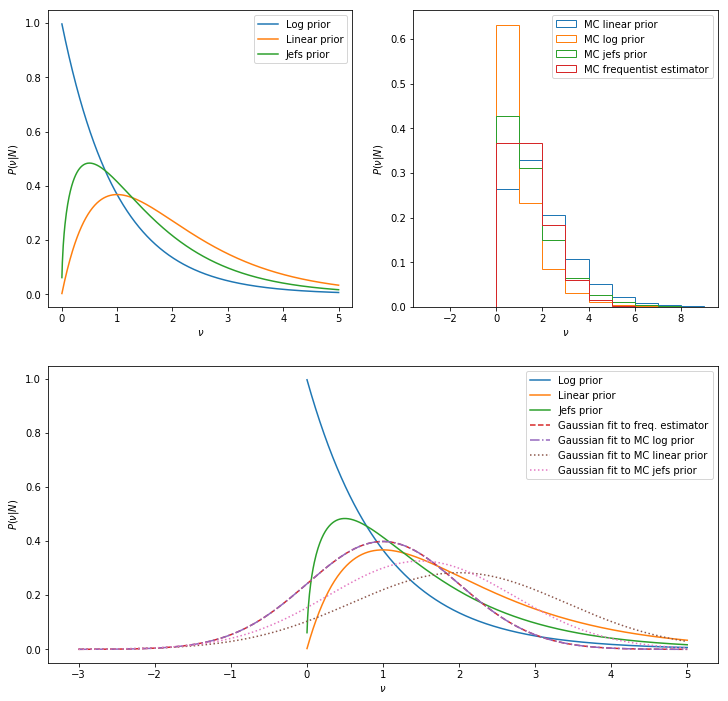

In [24]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
Nbins = np.arange(int(nu_grid[0]),int(2*nu_grid[-1])) # For the case Nobs = 1, to have bins between integer values. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,nu_posterior_log, label='Log prior')
ax1.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax1.plot(nu_grid,nu_posterior_jef, label='Jef''s prior')

ax2.hist(mc_sample_V_lin, normed=1, histtype="step", range=rng, bins=Nbins, label='MC linear prior')
ax2.hist(mc_sample_V_log, normed=1, histtype="step", range=rng, bins=Nbins, label='MC log prior')
ax2.hist(mc_sample_V_jef, normed=1, histtype="step", range=rng, bins=Nbins, label='MC jef''s prior')
ax2.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')

ax3.plot(nu_grid,nu_posterior_log, label='Log prior')
ax3.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax3.plot(nu_grid,nu_posterior_jef, label='Jef''s prior')
ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), '-.', label='Gaussian fit to MC log prior')
ax3.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), ':', label='Gaussian fit to MC linear prior')
ax3.plot(nu_grid,gaussian_VE_jef.pdf(nu_grid), ':', label='Gaussian fit to MC jef''s prior')


# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

For small $N$, there are many differences between them, and jef's prior is kind of a mixture between both of them. That is because jef's prior is the least informative one, and therefore should represent a bit better the sample. The gaussian is very off...

For larger $N$ (i.e. $N=150$) all different priors and both bayesian or frequentist are nearly equivalent. The Gaussian is more valid since it matches closely both the bayesian conditional theoretical probabilities and the MCs for both bayesian and frequentist. Gaussian approximation is only valid when $N\rightarrow\infty$


# Exercise 3

 An experiment produced data ...
 
 ## Part I

To generate a d-dimensional Gaussian, we have to do the following steps:
$$f\vec({x}) = \frac{1}{(2\pi)^{\frac{d}{2}}(detV)^{\frac{1}{2}}}e^{-\frac{1}{2}(\overrightarrow{x}-\overrightarrow{\mu})^{T}V^{-1}(\overrightarrow{x}-\overrightarrow{\mu})}$$

where $V = LL^{T}$, so:

$$(\overrightarrow{x}-\overrightarrow{\mu})^{T}V^{-1}(\overrightarrow{x}-\overrightarrow{\mu}) = (\overrightarrow{x}-\overrightarrow{\mu})^{T}(LL^{T})^{-1}(\overrightarrow{x}-\overrightarrow{\mu}) = (L^{-1}(\overrightarrow{x}-\overrightarrow{\mu}))^{T}(L^{-1}(\overrightarrow{x}-\overrightarrow{\mu})) = \overrightarrow{Y}^{T}\overrightarrow{Y}$$

where $\overrightarrow{Y} = L^{-1}(\overrightarrow{x}-\overrightarrow{\mu})$ and $\overrightarrow{x} = \overrightarrow{\mu} + L\overrightarrow{Y}$

$\overrightarrow{0}^{T}V\overrightarrow{0} = 0$ and $\overrightarrow{Y}^{T}V\overrightarrow{Y} > 0$

$$f\propto e^{-\frac{1}{2}\overrightarrow{Y}^{T}\overrightarrow{Y}} = \Pi^{d}_{i=1} e^{-\frac{1}{2}Y^{2}_{1}}\propto \Pi^{d}_{i=1}N_{Y_{i}}(0,1)$$

$$L_{jj} = (V_{jj}-\Sigma^{j-1}_{k=1}L^{2}_{jk})^{\frac{1}{2}}; j = 1,...,d$$

$$L_{ij} = \frac{V_{ij}-\Sigma^{j-1}_{k=1}L_{ik}K_{kj}}{L_{jj}}$$ j = 1,...,d; i = j+1,...,d

if: $V =
  M=
  \left[ {\begin{array}{cc}
   \sigma^{2}_{1} & \rho\sigma_{1}\sigma_{2}\\
   \rho\sigma_{2}\sigma_{1} & \sigma^{2}_{2} \\
  \end{array} } \right]$;  $Y_{1}\sim N(0,1);  Y_{2}\sim N(0,1)$
  
  $L = M=
  \left[ {\begin{array}{cc}
   \sigma_{1} & 0\\
   \rho\sigma_{2}& \sqrt{1-\rho^{2}}\sigma_{2} \\
  \end{array} } \right]$, so:
  
  $$x_{1} = \mu_{1} + \sigma_{1}Y_{1}$$ 
  
  and $$x_{2} = \mu_{2} + \rho^{2}\sigma_{2}Y_{1} + \sqrt{1-\rho^{2}}\sigma_{2}Y_{2}$$
  
  $$N(\mu_{1},\mu_{2},\sigma_{2},\sigma_{1},\rho)$$

In [25]:
# function to creat a 3d histogram
def hist3d(x,y,bins=5,fig=None,ax=None):
    # Note: fig and ax are inputs in order to allow the caller to create 
    # them outside and in this way, modify labels and legents once the function has been called
    # In addition, they being inputs allows to use this function to create subplots
    # x and y are the positions in the plane of the data
    # bins is directly passed to np.histugram2d, and therefore, accepts the same options as numpy https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram2d.html
    
    # for simplicity, fig and ax arguments are optional, therefore, if they are the default value None, 
    # they are created directly inside the function
    if fig==None:
        fig = plt.figure()
    if ax==None:
        ax = fig.add_subplot(111, projection='3d')
        
    # Call np.histogramm2d, it returns a 2d array H with the number of data points inside the area 
    # delimited by xedges and yedges
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, normed=1)
    
    # Construct arrays with the lower, left corner of the bars
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    # Construct arrays with the dimensions of the bars. It assumes that spacings only depend on the axis
    dx = (xedges[1]-xedges[0]) * np.ones_like(zpos)
    dy = (yedges[1]-yedges[0]) * np.ones_like(zpos)
    dz = H.flatten()

    #Choose colors according to colormap. As our data is normalized between 0 ans 1 but all vales may be small,
    # they are rescaled for aesthetic reasons
    plot_colors = cm.jet(dz/dz.max())
    
    # Plot. bar3d arguments are the cordinates of the vertex and the dimensions in each of the 3 axis, 
    # the other arguments are optional
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=plot_colors, alpha=None)
    return

In [26]:
N_3I = 10**4
mu1 = 2
mu2 = 1
sigma1 = 1
sigma2 = 2
rho = 0.8

y1 = np.random.normal(size=N_3I)
y2 = np.random.normal(size=N_3I)

x1 = mu1 + sigma1*y1
x2 = mu2 + rho*sigma2*y1 + np.sqrt(1-rho**2)*sigma2*y2
D = np.transpose(np.array([x1,x2]))

Text(0.5,0,u'Number of events')

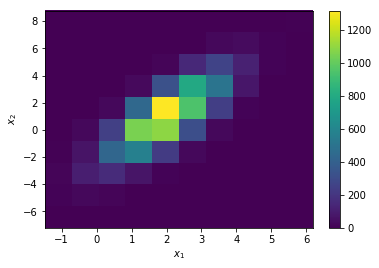

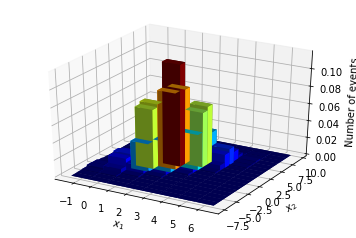

In [27]:
fig=plt.figure()
ax1=fig.add_subplot(111)
hist1 = ax1.hist2d(x1,x2)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
fig.colorbar(hist1[3], ax=ax1)


fig2 = plt.figure()
ax3d = fig2.gca(projection='3d')
xedges = np.arange(round(x1.min()),round(x1.max())+2)-.5
yedges = np.arange(round(x2.min()),round(x2.max())+2)-.5
hist3d(x1,x2,bins=(xedges,yedges),ax=ax3d,fig=fig2)
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('Number of events')

Con $\rho=0.999$, el plot muestra una correlación mucho más grande respecto x1 y x2 (es casi una linea recta en diagonal). Si $\rho=1$, x1 = x2.

## Part II

The PDF of a multi-dimensional (2D) gaussian is:

$$f(x_{1},x_{2})=\frac{1}{2\pi\sqrt{\det V}}e^{-\frac{1}{2}\left(\begin{array}{cc}
x_{1}-\mu_{1} & x_{2}-\mu_{2}\end{array}\right)V^{-1}\left(\begin{array}{c}
x_{1}-\mu_{1}\\
x_{2}-\mu_{2}
\end{array}\right)}=\frac{1}{2\pi\sigma_{1}\sigma_{2}\sqrt{1-\rho^{2}}}e^{-\frac{1}{2}\text{A}}$$

where 

$$
A\equiv\left(\begin{array}{cc}
x_{1}-\mu_{1} & x_{2}-\mu_{2}\end{array}\right)V^{-1}\left(\begin{array}{c}
x_{1}-\mu_{1}\\
x_{2}-\mu_{2}
\end{array}\right)
$$

and V is the covariance matrix: 

$$
V=\left[\begin{array}{cc}
\sigma_{1}^{2} & \rho\sigma_{1}\sigma_{2}\\
\rho\sigma_{1}\sigma_{2} & \sigma_{2}^{2}
\end{array}\right]
$$

The inverse of V is: 

$$
V^{-1}=\frac{1}{\det V}\left[\begin{array}{cc}
\sigma_{2}^{2} & -\rho\sigma_{1}\sigma_{2}\\
-\rho\sigma_{1}\sigma_{2} & \sigma_{1}^{2}
\end{array}\right]
$$

The determinant of V is:

$$
\det V=\sigma_{1}^{2}\sigma_{2}^{2}-\rho^{2}\sigma_{1}^{2}\sigma_{2}^{2}=\sigma_{1}^{2}\sigma_{2}^{2}\left(1-\rho^{2}\right)
$$

Calculate A: 

$$A=\left(\begin{array}{cc}
x_{1}-\mu_{1} & x_{2}-\mu_{2}\end{array}\right)V^{-1}\left(\begin{array}{c}
x_{1}-\mu_{1}\\
x_{2}-\mu_{2}
\end{array}\right)=
 \frac{1}{\det V}\left(\begin{array}{cc}
x_{1}-\mu_{1} & x_{2}-\mu_{2}\end{array}\right)\left(\begin{array}{c}
\sigma_{2}^{2}\left(x_{1}-\mu_{1}\right)-\rho\sigma_{1}\sigma_{2}\left(x_{2}-\mu_{2}\right)\\
\sigma_{1}^{2}\left(x_{2}-\mu_{2}\right)-\rho\sigma_{1}\sigma_{2}\left(x_{1}-\mu_{1}\right)
\end{array}\right)\\
 =\frac{1}{\det V}\left[\sigma_{2}^{2}\left(x_{1}-\mu_{1}\right)^{2}-\rho\sigma_{1}\sigma_{2}\left(x_{1}-\mu_{1}\right)\left(x_{2}-\mu_{2}\right)+\sigma_{1}^{2}\left(x_{2}-\mu_{2}\right)^{2}-\rho\sigma_{1}\sigma_{2}\left(x_{1}-\mu_{1}\right)\left(x_{2}-\mu_{2}\right)\right]\\
 =\frac{1}{\det V}\left\{ \left[\sigma_{1}\left(x_{2}-\mu_{2}\right)\right]^{2}+\left[\sigma_{2}\left(x_{1}-\mu_{1}\right)\right]^{2}-2\rho\sigma_{1}\sigma_{2}\left(x_{1}-\mu_{1}\right)\left(x_{2}-\mu_{2}\right)\right\} $$
  
Let $\pi=c$ the prior $\forall x_{1},x_{2}$ and $\Pi$ be the product (productorio). 

The likelihood is: $$L=\Pi_{i=1}^{N}f(x_{1i},x_{2i})$$ 
 
and the posterior is: 

$$p\left(\mu_{1},\mu_{2}|D\right)\propto\pi\text{·}L=\frac{c}{\left(2\pi\sigma_{1}\sigma_{2}\sqrt{1-\rho^{2}}\right)^{N}}e^{-\frac{1}{2}\sum A}\propto ce^{-\frac{1}{2}\sum A}$$

so the non-normalized likelihood is just:

$$L\propto e^{-\frac{1}{2}\sum A}$$
 
 

## Part III

Our Metropolis Hasting algorithm consists of the following steps:
Preliminary step: Take two functions: the likelihood function $L$ (or pdf, since it's the same in 1D) (part II), and the 2D Gaussian distribution from Part 1.
Then, loop over (*):
 1. Generate a value (vector [mu1,mu2]) using a gaussian centered at muold with sigma=step. mu*
 2. Calculate the likelihood of this try value mu* (part II). g(mu*)=L(mu*|D) where D is the sample generated in part I
 3. calculate the acceptance probability as A=min(1,g(mu*)/g(muold)
 4. Generate a uniform value between 0,1. eta=U(0,1)
 5. If A>eta, munew=mu*; else munew=muold
 6. Back to 1
 
(*) Note that the Metropolis Hasting algorithm is iterative. more info on it here:

https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/

https://python4mpia.github.io/fitting_data/Metropolis-Hastings.html

http://nbviewer.jupyter.org/github/drphilmarshall/LearningInference/blob/master/straightline.ipynb

In [28]:
def try_mu(muold,step):
    return np.random.normal(loc=muold,scale=step)

def g_ratio(munew,muold,D,rhoD2,det,s1,s2,rho):
    gnew = (s1*(D[:,0]-munew[0]))**2+(s2*(D[:,1]-munew[1]))**2-rhoD2 #rhoD2=2*rho*s1*s2*x1*x2
    gold = (s1*(D[:,0]-muold[0]))**2+(s2*(D[:,1]-muold[1]))**2-rhoD2
    return np.exp(-1./(2*det)*sum(gnew-gold))

In [29]:
N3_III = 10**6 
step = 0.5 # this is an initial guess
mus = np.ones((2,N3_III+1)) #the 1, 1 values are an initial guess

s1 = 1
s2 = 2 
rho = 0.999
rhoD2 = 2*rho*s1*s2*D[:,0]*D[:,1]

det = (s1*s2*np.sqrt(1-rho**2))**2



for i in xrange(N3_III):
    if i%5000==0:
        print i
    mutry = try_mu(mus[:,i],step)
    #print mutry
    A = min(1, g_ratio(mutry,mus[:,i],D,rhoD2,det,s1,s2,rho)) 
    #print A
    eta = np.random.random() #Generate a number from the uniform distribution
    if A>eta:
        mus[:,i+1]=mutry
    else:
        mus[:,i+1]=mus[:,i]
print mus

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
730

/Users/mbadenas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


2.00019222846 0.99340428937
[ 1.99931924  0.99297307]


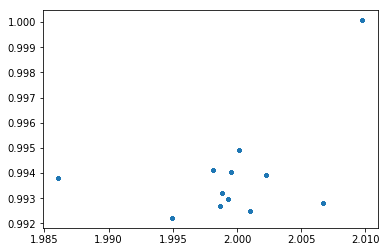

In [30]:
plt.plot(mus[0,5000:],mus[1,5000:],'.')
print np.mean(mus[0,5000:]),np.mean(mus[1,5000:])
print mus[:,-1]

Con $\rho=0.999$, el algoritmo tarda mucho más en converger (y por tanto da peor).

### Part IV: Gibbs sampler
Gibbs sampler is a Markov chain algorithm that generates a sample following a given pdf by making some tricks with the conditional pdf (see notes). To do that, the following steps are applied:
 1. Generate z0=[mux0,muy0]
 2. Draw values
  21. Draw mux_n+1 from P(mux|muy_n,D)
  22. Draw muy_n+1 from P(muy|mux_n+1,D)
 3. Goto 2

Once the burn in time has passed (let's say after Nburn iterations) the obtained values zNburn,zNburn+1,...,zN is our sample following the desired pdf. 

This mechanism iterations are simpler and thus faster than MCMC Metropolis hasting. But they are not really comparable. Gibbs obtains a sample by making displacements independently in x and y, whereas the metropolis hastings is a pure random walk with an acceptance probability.

#### Conditional probabilities
Therefore, the conditional probabilities P(mux|muy,D) and P(muy|mux,D) have to be calculated:

Sea $D=(x_i,y_i)_{i=1,..,N}$ una muestra de una distribucion gaussiana 2D. Sean $\mu_x$, $\mu_y$, $\sigma_x$, $\sigma_y$ y $\rho$ las correspondientes medias, desviaciones estandar y el coeficiente de correlacion.

Por el ejercicio 3.II sabemos que el posterior es:

$$P(\mu_x,\mu_y|D)=\frac{c}{(2\pi\sigma_x\sigma_y\sqrt{1-\rho^2})^N}e^{-\frac{1}{2}\sum_{i=1}^N{A_i}}$$

Donde $A_i$ viene dada por:

$$A_i=\frac{(x_i-\mu_x)^2}{\sigma_x^2(1-\rho^2)}+\frac{(y_i-\mu_y)^2}{\sigma_y^2(1-\rho^2)}-\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}(y_i-\mu_y)(x_i-\mu_x)$$

Desarrollando $A_i$ se llega a que:

$$A_i=\frac{x^2_i+\mu_x^2-2\mu_x x_i}{\sigma_x^2(1-\rho^2)}+\frac{(y_i-\mu_y)^2}{\sigma_y^2(1-\rho^2)}-\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}x_i y_i+\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}y_i\mu_x+\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}x_i\mu_y-\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}\mu_x\mu_y$$

Por lo tanto se tiene que:

$$P(\mu_x | \mu_y;D)\propto \exp\bigg(-\frac{1}{2}\sum_{i=1}^N\Big(\frac{\mu_x^2-2\mu_x x_i}{\sigma_x^2(1-\rho^2)}+\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}y_i\mu_x-\frac{2\rho}{\sigma_x\sigma_y(1-\rho^2)}\mu_x\mu_y\Big)\bigg)$$

Esto es debido a que $P(\mu_x | \mu_y;D)$ es la probabilidad de obtener $\mu_x$ cuando $\mu_y$ esta FIJO, por lo tanto cualquier termino donde no haya un $\mu_x$ sera constante.

Desarrollando aun mas esta expresion

$$P(\mu_x | \mu_y;D)\propto \exp\bigg(-\frac{1}{2}\sum_{i=1}^N{\frac{\mu_x^2\sigma_y-2\mu_x x_i\sigma_y+2\rho\sigma_x\mu_x(y_i-\mu_y)}{\sigma_x^2\sigma_y(1-\rho^2)}}\bigg)=\exp\bigg(-\frac{1}{2}\sum_{i=1}^N{\frac{\mu_x^2-\mu_x\big(2x_i-2\rho\frac{\sigma_x}{\sigma_y}(y_i-\mu_y)\big)}{\sigma_x^2(1-\rho^2)}}\bigg)$$

Entonces, ya que $\mu_j$ (j=x,y) no depende del sumatorio se tiene que:

$$\sum_{i=1}^N{\Big(\mu_x^2-2\mu_x\big(x_i-\rho\frac{\sigma_x}{\sigma_x}(y_i-\mu_y)\big)\Big)}=\mu_x^2 N-2\mu_x\bigg(\sum_{i=1}^N{x_i}-\rho\frac{\sigma_x}{\sigma_y}\Big(\sum_{i=1}^N{y_i}-N\mu_y\Big)\bigg)=N\Big(\mu_x^2-2\mu_x\big(\frac{1}{N}\sum_{i=1}^N{x_i}-\rho\frac{\sigma_x}{\sigma_y}(\frac{1}{N}\sum_{i=1}^N{y_i}-\mu_y)\big)\Big)$$

Definiendo las medias muestrales como $$\bar{x}=\frac{1}{N}\sum_{i=1}^N{x}_i \quad ; \quad 
\bar{y}=\frac{1}{N}\sum_{i=1}^N{y}_i$$
Se obtiene la expresion:
$$N\Big(\mu_x^2-2\mu_x\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)\Big)$$
Y por lo tanto:
$$P(\mu_x | \mu_y;D)\propto \exp\bigg(-\frac{N}{2\sigma_x^2(1-\rho^2)}\Big(\mu_x^2-2\mu_x\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)\Big)\bigg)$$

Sumando y restando el termino $\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)^2$:

$$P(\mu_x | \mu_y;D)\propto \exp\bigg(-\frac{N}{2\sigma_x^2(1-\rho^2)}\Big(\mu_x^2-2\mu_x\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)+\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)^2-\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)^2\Big)\bigg)$$

Y haciendo cuadrados:
$$P(\mu_x | \mu_y;D)\propto \exp\Bigg(-\frac{N}{2\sigma_x^2(1-\rho^2)}\bigg(\Big(\mu_x-\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)\Big)^2-\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)^2\bigg)\Bigg)
\propto \exp\bigg(-\frac{\Big(\mu_x-\big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)\big)\Big)^2}{2\frac{\sigma_x^2(1-\rho^2)}{N}}\bigg)$$

Que se corresponde con la forma de una distribucion normal con media $\mu=\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y)$ y desviacion estandar $\sigma=\frac{\sigma_x\sqrt{1-\rho^2}}{\sqrt{N}}$. 

Se concluye que:
$$P(\mu_x | \mu_y;D)\equiv \mathcal{N}\Big(\bar{x}-\rho\frac{\sigma_x}{\sigma_y}(\bar{y}-\mu_y),\frac{\sigma_x\sqrt{1-\rho^2}}{\sqrt{N}}\Big)$$
$$P(\mu_y | \mu_x;D)\equiv \mathcal{N}\Big(\bar{y}-\rho\frac{\sigma_y}{\sigma_x}(\bar{x}-\mu_x),\frac{\sigma_y\sqrt{1-\rho^2}}{\sqrt{N}}\Big)$$
Donde la segunda probabilidad condicionada se obtiene directamente debido a la simetria que existe entre $\mu_x$ y $\mu_y$ en la ecuacion original.

In [31]:
N3_IV = 10**5
# Target mean
Mean1 = np.mean(D[:,0])
Mean2 = np.mean(D[:,1])
s1 = 1
s2 = 2 
rho = 0.8

Sig1 = sigma1*np.sqrt(1-rho**2)/np.sqrt(len(D))
Sig2 = sigma2*np.sqrt(1-rho**2)/np.sqrt(len(D))

sample_IV = np.zeros((2,N3_IV+1))

D1 = Mean1-rho*sigma1/sigma2*Mean2
D2 = Mean2-rho*sigma2/sigma1*Mean1

for i in range(N3_IV):
    sample_IV[0,i+1] = np.random.normal(D1+rho*sigma1/sigma2*sample_IV[1,i], Sig1)
    sample_IV[1,i+1] = np.random.normal(D2+rho*sigma2/sigma1*sample_IV[0,i+1], Sig2)
    
SampleMean1=np.mean(sample_IV[0,50:])
SampleMean2=np.mean(sample_IV[1,50:])
print 'Sample means are:\n\tmean_x=%.4g\n\tmean_y=%.4g' %(SampleMean1, SampleMean2)

SampleStd1=np.std(sample_IV[0,50:])
SampleStd2=np.std(sample_IV[1,50:])
print 'And standard devistions:\n\tstd_x=%.4f\n\tstd_y=%.4f' %(SampleStd1, SampleStd2)

Sample means are:
	mean_x=2.001
	mean_y=0.9933
And standard devistions:
	std_x=0.0100
	std_y=0.0200


https://theclevermachine.wordpress.com/2012/11/05/mcmc-the-gibbs-sampler/

### Part V

Repetir ejercicios 1-4 con $\rho=0.999$ 